<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.029338,74.949478,47.143298,0.005664,216.127779,216.131526,-0.003748
1,0.0,1.0,95.863652,71.246326,69.497575,0.030302,246.637855,246.617998,0.019857
2,0.0,2.0,75.335168,86.155727,91.055340,0.026723,262.572958,262.544549,0.028409
3,0.0,3.0,97.935788,88.626073,39.891989,-0.000511,236.453338,236.459209,-0.005870
4,0.0,4.0,37.297650,59.714356,53.601055,0.051422,160.664482,160.623067,0.041416
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.000953,74.545787,34.958172,-0.017618,218.487294,218.496301,-0.009007
29996,999.0,26.0,83.943710,52.324950,69.290183,-0.039866,215.518977,215.549746,-0.030770
29997,999.0,27.0,33.335976,47.700495,57.723261,-0.017614,148.742118,148.779066,-0.036948
29998,999.0,28.0,72.607876,50.118847,72.985517,-0.045581,205.666659,205.706294,-0.039635


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.029338,74.949478,47.143298,0.005664,216.127779,216.131526,-0.003748
1,0.0,1.0,95.863652,71.246326,69.497575,0.030302,246.637855,246.617998,0.019857
2,0.0,2.0,75.335168,86.155727,91.055340,0.026723,262.572958,262.544549,0.028409
3,0.0,3.0,97.935788,88.626073,39.891989,-0.000511,236.453338,236.459209,-0.005870
4,0.0,4.0,37.297650,59.714356,53.601055,0.051422,160.664482,160.623067,0.041416
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.000953,74.545787,34.958172,-0.017618,218.487294,218.496301,-0.009007
29996,999.0,26.0,83.943710,52.324950,69.290183,-0.039866,215.518977,215.549746,-0.030770
29997,999.0,27.0,33.335976,47.700495,57.723261,-0.017614,148.742118,148.779066,-0.036948
29998,999.0,28.0,72.607876,50.118847,72.985517,-0.045581,205.666659,205.706294,-0.039635


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.029338  74.949478  47.143298  ...  216.127779  216.131526 -0.003748
      1.0    95.863652  71.246326  69.497575  ...  246.637855  246.617998  0.019857
      2.0    75.335168  86.155727  91.055340  ...  262.572958  262.544549  0.028409
      3.0    97.935788  88.626073  39.891989  ...  236.453338  236.459209 -0.005870
      4.0    37.297650  59.714356  53.601055  ...  160.664482  160.623067  0.041416
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   99.000953  74.545787  34.958172  ...  218.487294  218.496301 -0.009007
      26.0   83.943710  52.324950  69.290183  ...  215.518977  215.549746 -0.030770
      27.0   33.335976  47.700495  57.723261  ...  148.742118  148.779066 -0.036948
      28.0   72.607876  50.118847  72.985517  ...  205.666659  205.706294 -0.039635
      29.0   31.699863  50.565626  50.770725  ...  143.111173  143.058487  0.052686

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.029338  74.949478  47.143298  ...  216.127779  216.131526 -0.003748
      1.0    95.863652  71.246326  69.497575  ...  246.637855  246.617998  0.019857
      2.0    75.335168  86.155727  91.055340  ...  262.572958  262.544549  0.028409
      3.0    97.935788  88.626073  39.891989  ...  236.453338  236.459209 -0.005870
      4.0    37.297650  59.714356  53.601055  ...  160.664482  160.623067  0.041416
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   99.000953  74.545787  34.958172  ...  218.487294  218.496301 -0.009007
      26.0   83.943710  52.324950  69.290183  ...  215.518977  215.549746 -0.030770
      27.0   33.335976  47.700495  57.723261  ...  148.742118  148.779066 -0.036948
      28.0   72.607876  50.118847  72.985517  ...  205.666659  205.706294 -0.039635
      29.0   31.699863  50.565626  50.770725  ...  143.111173  143.058487  0.052686

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.029338,74.949478,47.143298,0.005664,216.127779,216.131526,-0.003748
1,0.0,1.0,95.863652,71.246326,69.497575,0.030302,246.637855,246.617998,0.019857
2,0.0,2.0,75.335168,86.155727,91.055340,0.026723,262.572958,262.544549,0.028409
3,0.0,3.0,97.935788,88.626073,39.891989,-0.000511,236.453338,236.459209,-0.005870
4,0.0,4.0,37.297650,59.714356,53.601055,0.051422,160.664482,160.623067,0.041416
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.000953,74.545787,34.958172,-0.017618,218.487294,218.496301,-0.009007
29996,999.0,26.0,83.943710,52.324950,69.290183,-0.039866,215.518977,215.549746,-0.030770
29997,999.0,27.0,33.335976,47.700495,57.723261,-0.017614,148.742118,148.779066,-0.036948
29998,999.0,28.0,72.607876,50.118847,72.985517,-0.045581,205.666659,205.706294,-0.039635


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.029338  74.949478  47.143298  ...  216.127779  216.131526 -0.003748
      1.0    95.863652  71.246326  69.497575  ...  246.637855  246.617998  0.019857
      2.0    75.335168  86.155727  91.055340  ...  262.572958  262.544549  0.028409
      3.0    97.935788  88.626073  39.891989  ...  236.453338  236.459209 -0.005870
      4.0    37.297650  59.714356  53.601055  ...  160.664482  160.623067  0.041416
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   99.000953  74.545787  34.958172  ...  218.487294  218.496301 -0.009007
      26.0   83.943710  52.324950  69.290183  ...  215.518977  215.549746 -0.030770
      27.0   33.335976  47.700495  57.723261  ...  148.742118  148.779066 -0.036948
      28.0   72.607876  50.118847  72.985517  ...  205.666659  205.706294 -0.039635
      29.0   31.699863  50.565626  50.770725  ...  143.111173  143.058487  0.052686

[30000 rows x 7 columns]

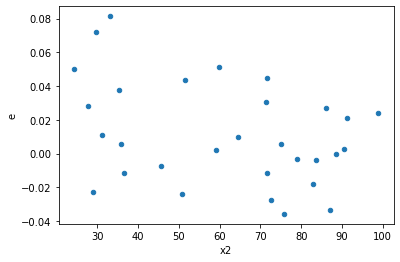

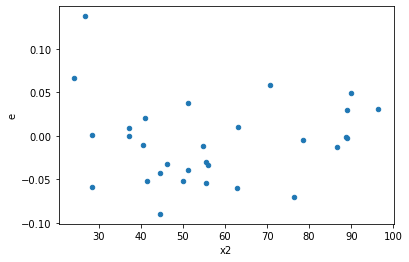

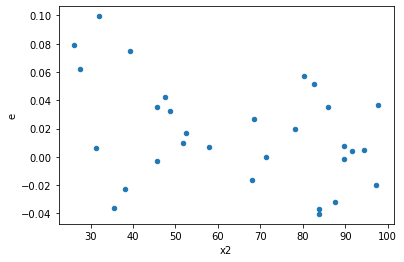

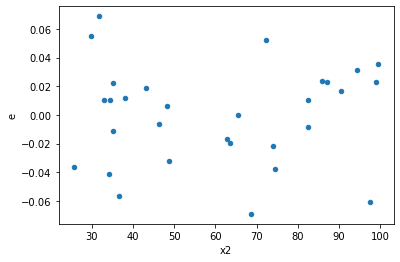

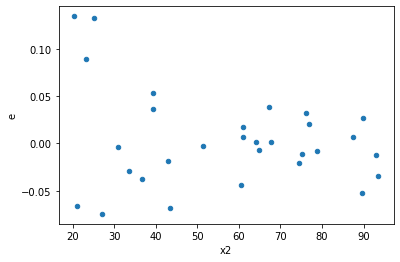

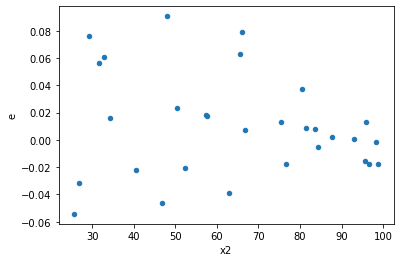

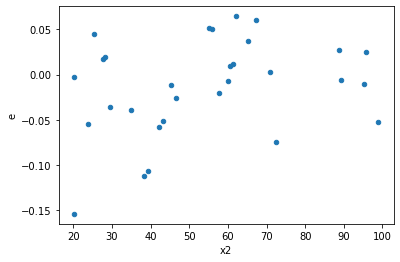

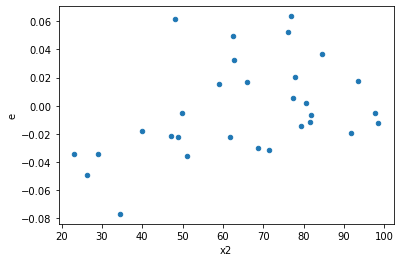

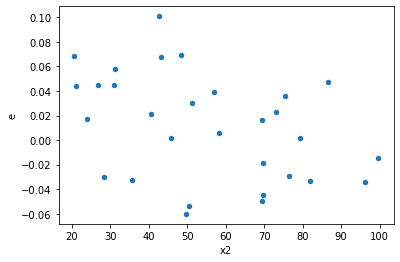

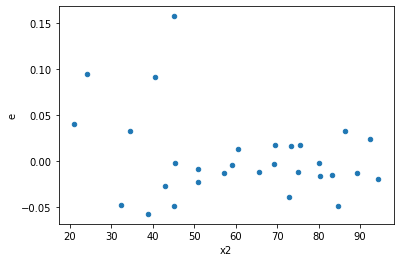

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
48.0,9.0,9.0,0.011006229638753936,0.014531462206051369,0.0012229144043059928,0.0016146069117834855,1.320294295412915,0.6856564318083693,0.6571717840958153,0.34282821590418466,Reject001=1 : Homoscedasticity
108.0,9.0,9.0,0.004538486695633883,0.00557680395738954,0.0005042762995148759,0.0006196448841543933,1.2287805013848645,0.7639279699366757,0.6180360150316622,0.38196398496833783,Reject001=1 : Homoscedasticity
125.0,9.0,9.0,0.008460867626042253,0.00877204094935874,0.0009400964028935837,0.0009746712165954155,1.0367779448952381,0.9579756864522952,0.5210121567738524,0.4789878432261476,Reject001=1 : Homoscedasticity
145.0,9.0,9.0,0.003812018099117899,0.0073125853583499625,0.00042355756656865546,0.0008125094842611069,1.918297649227346,0.34595116210267385,0.8270244189486631,0.17297558105133692,Reject001=1 : Homoscedasticity
148.0,9.0,9.0,0.015390032707217451,0.01573593242699801,0.0017100036341352724,0.0017484369363331123,1.0224755675547292,0.9741305699663931,0.5129347150168034,0.48706528498319657,Reject001=1 : Homoscedasticity
158.0,9.0,9.0,0.005761200902773358,0.0062410113100996355,0.0006401334336414842,0.0006934457011221817,1.083283054249211,0.9070988943805711,0.5464505528097144,0.45354944719028556,Reject001=1 : Homoscedasticity
197.0,9.0,9.0,0.012457484396875274,0.012727365663478513,0.0013841649329861415,0.0014141517403865014,1.0216641866050367,0.9750542114796614,0.5124728942601693,0.4875271057398307,Reject001=1 : Homoscedasticity
256.0,9.0,9.0,0.008777523871983687,0.009922762460651923,0.0009752804302204097,0.001102529162294658,1.1304739930498664,0.8580384809395261,0.570980759530237,0.42901924046976303,Reject001=1 : Homoscedasticity
257.0,9.0,9.0,0.005858268507240739,0.007949627850589317,0.0006509187230267487,0.0008832919833988129,1.3569927429518955,0.656643584819546,0.671678207590227,0.328321792409773,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.011694325749197914,0.0031884905833112764,0.0012993695276886572,0.0003542767314790307,0.2726527934737894,0.06624443004723692,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,0.019904781410335054,0.013692068637674163,0.0022116423789261173,0.0015213409597415737,0.6878783723073142,0.5862093320892378,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,0.013299139088555964,0.010957416270176906,0.0014776821209506628,0.0012174906966863229,0.8239192174180557,0.7776620419029994,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,0.012020834750141346,0.01052502755327138,0.0013356483055712606,0.0011694475059190422,0.8755654471622799,0.8463253493835986,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,0.03440448568122978,0.005063861507734735,0.0038227206312477532,0.0005626512786371927,0.14718608365935984,0.00873826983642331,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,0.014727170877813119,0.0017550752934300375,0.0016363523197570132,0.00019500836593667082,0.11917260334597636,0.004044342193754869,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,0.023058462126070545,0.014453990386136902,0.0025620513473411715,0.001605998931792989,0.6268410402701928,0.4974747938314081,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,0.006189569636885535,0.00520994308812793,0.0006877299596539484,0.0005788825653475478,0.8417294567751994,0.8016376923704364,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,0.017063447451354862,0.007429425758016485,0.0018959386057060957,0.0008254917508907205,0.43540004323256365,0.23138521937199735,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      731
Reject001=0 : Heteroscedasticity    269
Name: Result_test, dtype: int64